In [1]:
# Populating the interactive namespace from numpy, matplotlib, math, pyproj
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import *
import pyproj
geod = pyproj.Geod(ellps="WGS84")

In [16]:
def create_subfaults(lon, lat, D, W, nlayers):
    """
    Calculates the coordinates and the strike angles of subfaults with
    length D along the fault and width w perpendicular to fault.
    As an input receives vectors of coordinates (in degrees) of the fault
    (longitude and latitude, respectfully, sorted by ascending longitude), 
    the length and the width of the subfault (in meters) and the desired 
    number of the subfault layers (in the direction perpendicular to the fault).
    """
    
    n = len(lon) - 2
    p1 = lon[0]
    p2 = lat[0]
    lons2 = []
    lats2 = []
    strike = []
    i = 0
    d = D/2
    
    while True:
        # calculate distance and angles from current position to the next point along the fault
        az1, az2, dist = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
        
        # if the distance to the next point is greater than the required distance
        if dist > d:
            
            # calculate coordinates of the point on the fault at the required distance 
            # in the direction of the next point
            p1, p2, backaz = geod.fwd(p1, p2, az1, d, radians=False)
            
            # save the coordinates and the strike angle of the subfault
            lons2.append(p1)
            lats2.append(p2)
            strike.append(az2)
            d = D
            
        # if the distance to the next point is smaller than the required distance    
        else:
            
            # move the current position to the next point and calculate the remaining 
            # distance
            d = d - dist
            i = i + 1 
            p1 = lon[i]
            p2 = lat[i]
            
        if i > n:
            break
            
    # when more than one layer are required
    if nlayers > 1:
        
        # find the number of subfaults in each layer
        len_layer = len(lons2)
        
        # for each layer
        for j in range(2, nlayers + 1):
            
            # for each subfault in the layer
            for i in range(len_layer):
                
                # calculate coordinates of the subfault at the required distance 
                #from the previous layer perpendicular to the fault
                b = i + len_layer*(j - 2)
                dlons2, dlats2, backaz = geod.fwd(lons2[b], lats2[b], strike[b] + 90, W, radians=False)
                
                # save the coordinates and the strike angle of the subfault
                lons2.append(dlons2)
                lats2.append(dlats2)
                strike.append(strike[b])
                
    return lons2, lats2, strike

# Examples

1. Hellenic arc

creating two layers of subfaults, 40 km of length and 20 km of width each.

In [52]:
# input: longitudes of Hellenic arc
lon = np.array([19.8686076, 20.00207124, 20.12339917, 20.23262055, 20.34187112, 20.46322822, 20.57242043, 
                20.68161265, 20.80294058, 20.92418099, 21.03331486, 21.17879751, 21.28798973, 21.40925931, 
                21.51842236, 21.6275854, 21.74885498, 21.87015374, 21.99142332, 22.11266373, 22.2459815, 
                22.35505703, 22.47632661, 22.59756702, 22.71886578, 22.85230024, 22.97362817, 23.10709181, 
                23.20417748, 23.32547624, 23.32547624, 23.48312378, 23.61652907, 23.74987602, 23.87111643, 
                24.0044342, 24.14988769, 24.27109892, 24.42862977, 24.57399574, 24.71936171, 24.87686339, 
                25.03436506, 25.20391493, 25.36135827, 25.5188016, 25.65197351, 25.80927098, 25.93021967, 
                26.05113918, 26.18413606, 26.31716211, 26.4622947, 26.58321421, 26.71626944, 26.8614312, 
                27.00662213, 27.13964818, 27.27273258, 27.39368126, 27.51460078, 27.63552029, 27.75641063, 
                27.84095219, 27.90128067, 27.96157998, 28.00977275, 28.04585898, 28.08194521, 28.13013799, 
                28.19046647, 28.26290148, 28.34741387, 28.43195542, 28.51652615, 28.60109688, 28.68566761])

In [53]:
# input: latitudes of Hellenic arc
lat = np.array([37.91566265, 37.79518072, 37.68674699, 37.57831325, 37.45783133, 37.3373494, 37.24096386, 
                 37.14457831, 37.03614458, 36.96385542, 36.89156627, 36.80722892, 36.71084337, 36.62650602, 
                 36.54216867, 36.45783133, 36.37349398, 36.27710843, 36.19277108, 36.12048193, 36.06024096, 
                 36.01204819, 35.92771084, 35.85542169, 35.75903614, 35.65060241, 35.54216867, 35.42168675, 
                 35.3253012, 35.22891566, 35.22891566, 35.12048193, 35.02409639, 34.95180723, 34.87951807, 
                 34.81927711, 34.74698795, 34.68674699, 34.62650602, 34.59036145, 34.55421687, 34.5060241, 
                 34.45783133, 34.43373494, 34.40963855, 34.38554217, 34.38554217, 34.42168675, 34.46987952, 
                 34.53012048, 34.60240964, 34.6626506, 34.72289157, 34.78313253, 34.8313253, 34.87951807, 
                 34.91566265, 34.97590361, 35.01204819, 35.06024096, 35.12048193, 35.18072289, 35.25301205, 
                 35.3373494, 35.42168675, 35.51807229, 35.61445783, 35.71084337, 35.80722892, 35.90361446, 
                 35.98795181, 36.07228916, 36.1686747, 36.25301205, 36.3253012, 36.39759036, 36.46987952])

In [54]:
# calculating coordinates and strike angles of subfaults
[lons2, lats2, strike] = create_subfaults(lon, lat, 40000, 20000, 2)

In [55]:
# defining parameters of each subfault (in the example all parameters are uniformely distributed)
depth = 5*np.ones(len(lons2))
length = 40*np.ones(len(lons2))
width = 20*np.ones(len(lons2))
dip = 15*np.ones(len(lons2))
rake = 90*np.ones(len(lons2))
slip = 10*np.ones(len(lons2))

In [56]:
with open("hellenicarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons2, lats2, depth, length, width, strike, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [57]:
from clawpack.geoclaw import dtopotools, fgmax_tools
import os
CLAW = os.environ['CLAW']
subfault_fname = 'hellenicarc.csv'
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

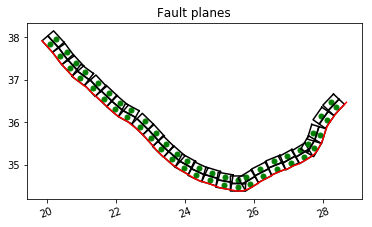

In [28]:
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')

In [26]:
fg = fgmax_tools.FGmaxGrid()
fg.read_input_data("fgmax_grid.txt")
fg.read_output(outdir="_output")

Reading _output/fort.FG1.valuemax ...
Reading _output/fort.FG1.aux1 ...


In [ ]:
fault.plot_subfaults

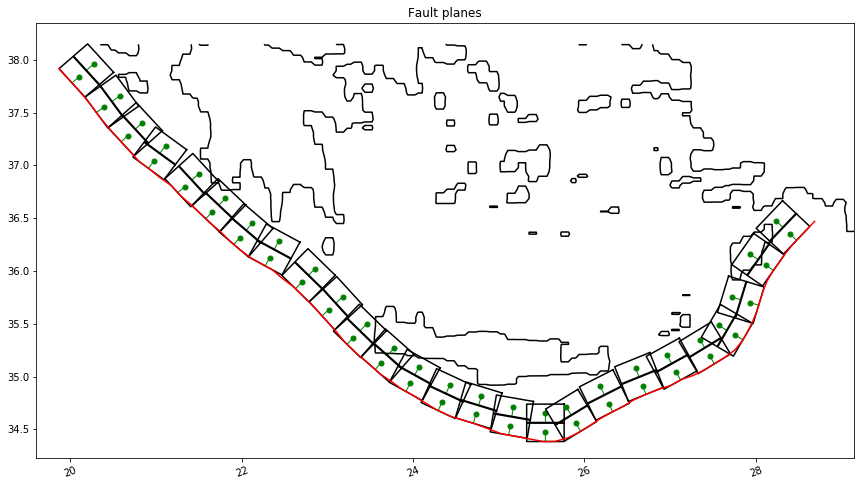

In [58]:
_, axes = plt.subplots(figsize=(16, 8))
fault.plot_subfaults(axes=axes, plot_rake=True)
plt.plot(lon, lat, 'r')
plt.contour(fg.X[590:820, 125:220], fg.Y[590:820, 125:220], fg.B[590:820, 125:220], levels=[0], colors="k")

2. Cyprian arc

creating two layers of subfaults, 50 km of length and 20 km of width each.

In [29]:
lon = np.array([32.01659883, 32.12934779, 32.24198274, 32.3550737, 32.43054368, 32.50578565, 32.58114163, 
                32.71310008, 32.86404004, 32.9959985, 33.09022196, 33.20354093, 33.33561339, 33.42972286, 
                33.52360432, 33.61759978, 33.67408826, 33.78729323, 33.8627632, 33.93834718, 34.05189416, 
                34.12770615, 34.18453663, 34.26023462, 34.35468609, 34.48687256, 34.63781251, 34.76977097, 
                34.88320394, 35.01561841, 35.0914304, 35.16712838, 35.22395887, 35.31863835, 35.41343183, 
                35.48935782, 35.54641632, 35.60347481, 35.66064731, 35.71781981, 35.77510631, 35.83262081,
                35.87103982, 35.89047733, 35.90991484, 35.92958036])

In [30]:
lat = np.array([34.33724364, 34.27648004, 34.20061106, 34.18516365, 34.18493565, 34.15449685, 
                34.13916345, 34.12365904, 34.12320303, 34.10769862, 34.09230822, 34.10707161, 
                34.10667259, 34.0761768, 34.01547021, 33.96986901, 33.95459261, 33.9542506, 
                33.9540226, 33.96889999, 34.01387416, 34.05896234, 34.08900213, 34.11898492, 
                34.13380531, 34.14851169, 34.14805568, 34.13255127, 34.16242006, 34.20733723, 
                34.25242541, 34.2824082, 34.31244799, 34.35747917, 34.41761574, 34.47780932, 
                34.5380599, 34.59831048, 34.67366645, 34.74902242, 34.83948379, 34.96015596, 
                35.05067433, 35.1261443, 35.20161428, 35.30729505])

In [41]:
[lons2, lats2, strike] = create_subfaults(lon, lat, 50000, 20000, 2)

In [42]:
depth = 5*np.ones(len(lons2))
length = 50*np.ones(len(lons2))
width = 20*np.ones(len(lons2))
dip = 15*np.ones(len(lons2))
rake = 90*np.ones(len(lons2))
slip = 10*np.ones(len(lons2))

In [43]:
with open("cyprianarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons2, lats2, depth, length, width, strike, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [44]:
subfault_fname = 'cyprianarc.csv'
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

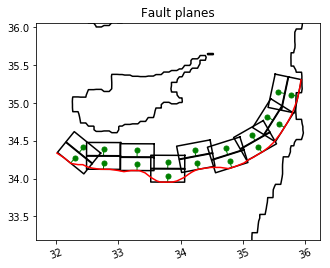

In [45]:
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')
plt.contour(fg.X[880:990, 100:170], fg.Y[880:990, 100:170], fg.B[880:990, 100:170], levels=[0], colors="k")